<a href="https://colab.research.google.com/github/rodrigoviana-ds/An-lise-de-Dados/blob/main/Regress%C3%A3o_Linear_Sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação dos Dados

In [44]:
import pandas as pd

In [45]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [46]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
dados.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


In [48]:
#Instalando biblioteca de visualização
!pip install sweetviz

In [49]:
#Importando biblioteca

import sweetviz

In [50]:
#Criando um arquivo html com Análise de Dados

eda = sweetviz.analyze([dados, "Seguro Saúde"], target_feat = "charges")
eda.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [51]:
#Transformando smoker em variável numérica - 0 (não) ou 1 (sim)
#Mudando a escala da variável charge (para cada mil dólares)

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000

In [52]:
#Prever custos (charges) sabendo o IMC (bmi) e se a pessoa é fumante ou não.

dados = dados[['bmi', 'smoker', 'charges']]
dados.head().round(4)

,bmi,smoker,charges
0,27.900,1,16.8849
1,33.770,0,1.7256
2,33.000,0,4.4495
3,22.705,0,21.9845
4,28.880,0,3.8669


In [53]:
import seaborn as sns

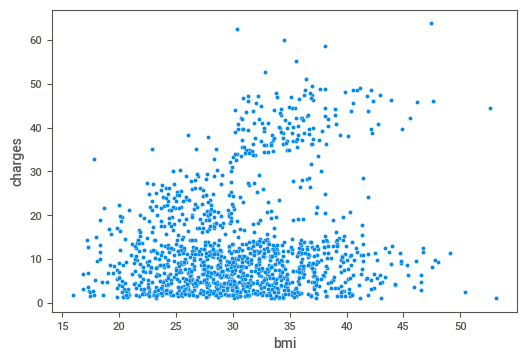

In [54]:
#Dispersão dos dados em relação 

sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

#A dispersão não sugere relação linear entre as variáveis

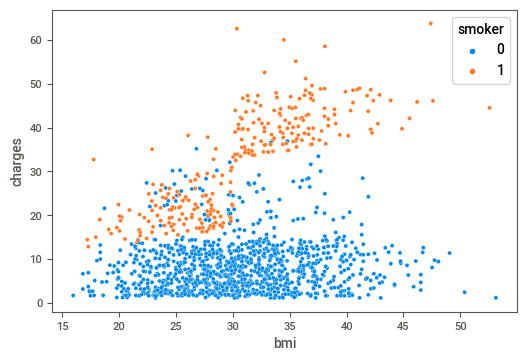

In [55]:
#Separando fumantes e não fumantes no conjunto de dados

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)


#Cenário 1: Considerando apenas a variável IMC (bmi)

In [56]:
#Usando IMC (bmi) ára prever custos (charges)

x = dados['bmi'].values.reshape(-1, 1)
y = dados['charges']

In [57]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
reg.predict(x)

array([12.18199477, 14.49402946, 14.19074723, ..., 15.70715839,
       11.3548614 , 12.64282621])

In [59]:
y

0       16.884924
1        1.725552
2        4.449462
3       21.984471
4        3.866855
          ...    
1333    10.600548
1334     2.205981
1335     1.629833
1336     2.007945
1337    29.141360
Name: charges, Length: 1338, dtype: float64

In [60]:
#Validação HoldOut
#Separando em dados teste e treinamento
#25% para teste e 75% para treinamento

from sklearn.model_selection import train_test_split

Xtreino, Xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)


In [61]:
print(Xtreino.shape)
print(Xteste.shape)

(1003, 1)
(335, 1)


In [62]:
#Ajuste do Modelo de Regressão Linear

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(Xtreino, ytreino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
yteste

758      5.428728
596      7.640309
204      7.147105
1236    14.449854
1031    44.423803
          ...    
964     26.467097
274      2.523169
74       7.726854
419     28.950469
5        3.756622
Name: charges, Length: 335, dtype: float64

In [64]:
#Predição utilizando a amostra teste

preditos = reg.predict(Xteste)
preditos

array([15.7150265 , 12.68940407,  9.95682934,  9.71325722, 14.86632989,
       14.28023448, 11.99103713, 13.44295531, 13.22982971, 14.77499035,
       15.57040555, 12.24031797, 10.07480958, 11.63138767,  8.01396109,
        9.50774324, 16.83393593, 11.62948476, 12.8568599 , 12.81119013,
       14.44769031, 11.52101905, 15.02807701, 11.18230157, 11.59332952,
       13.94341991,  8.73706583, 14.63798103,  8.05011633, 13.95293444,
       21.4808353 , 14.71409732, 10.72560384, 13.76264372, 11.62948476,
       11.66944581, 11.08715621, 12.93107328, 15.70360906, 14.33351588,
       13.61802278, 19.05272572, 12.09950284,  9.06246296, 15.93195792,
       11.88257142, 16.36582076, 11.76839698, 15.95479281, 11.09857365,
       10.17756657, 14.36396239, 12.09950284, 10.83406955, 12.81119013,
       15.74547302, 12.24412378, 12.49721044, 16.27448122, 16.94430455,
       14.19650656, 15.20124156, 13.94341991, 16.28970447, 12.31643426,
       13.42012043, 13.58186754, 10.43636195, 17.73971975, 14.30

In [65]:
import numpy as np

np.mean((preditos - yteste)**2)

135.9605068222783

In [66]:
#Erro Quadrático Médio

from sklearn.metrics import mean_squared_error
eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 4)))

EQM: 135.9605


In [67]:
#Coeficientes

b0 = reg.intercept_
b1 = reg.coef_

print('Intercepto: \n', b0)
print('Coeficientes: \n', b1)

Intercepto: 
 1.4698632576729196
Coeficientes: 
 [0.38058144]


#O Modelo de Regressão

##Nesse cenário, o modelo de regressão linear é dado por:

##Custos = b0 + b1*IMC(bmi)

<function matplotlib.pyplot.show>

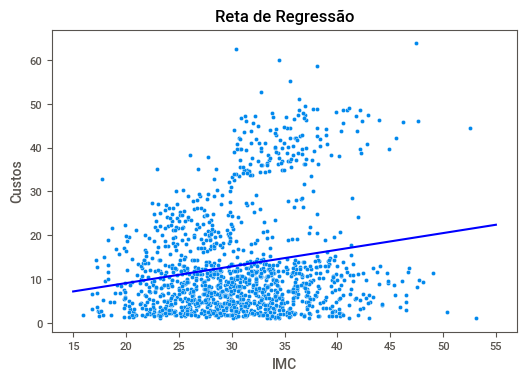

In [69]:
x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x

import matplotlib.pyplot as plt

sns.scatterplot(x = 'bmi', y = 'charges', data = dados);
plt.plot(x, y0, color = 'blue')
plt.title('Reta de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show


#Cenário 2: Considerando a variável bmi e smoker

In [83]:
x = dados[['bmi', 'smoker']]
y = dados['charges']

In [86]:
Xtreino, Xteste, ytreino, yteste = train_test_split(x, y, test_size = 0.25)

reg = LinearRegression()
reg.fit(Xtreino, ytreino)

preditos = reg.predict(Xteste)

eqm = mean_squared_error(yteste, preditos)
print('EQM: {}'.format(round(eqm, 4)))

EQM: 41.6257


In [87]:
#Coeficientes

b0 = reg.intercept_
b1, b2 = reg.coef_

print('Intercepto: \n', reg.intercept_)
print('Coeficientes: \n', reg.coef_)

Intercepto: 
 -3.2879767499757655
Coeficientes: 
 [ 0.38413545 23.9319395 ]


In [88]:
import numpy as np

x = np.arange(15, 55, 0.01)
y0 = b0 + b1*x + b2*0
y1 = b0 + b1*x + b2*1

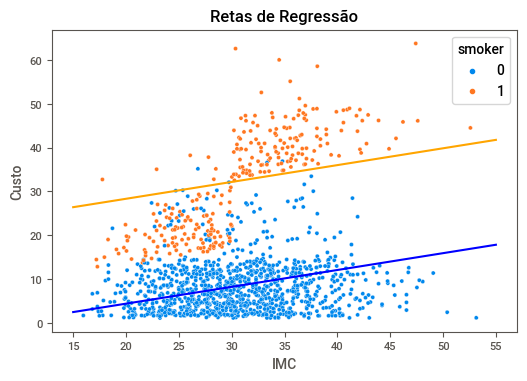

In [89]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)
plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Retas de Regressão')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()